<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st # Cargar todas las librerías 

## Cargar datos

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
print("Archivos cargados:")
print('---Users Info---')
users.info()
print('\n---Users Head---')
print(users.head())
print('\n---Calls Info---')
calls.info()
print('\n---Calls Head---')
print(calls.head())
print('\n---Messages Info---')
messages.info()
print('\n---Messages Head---')
print(messages.head())
print('\n---Internet Info---')
internet.info()
print('\n---Internet Head---')
print(internet.head())
print('\n---Plans Info---')
plans.info()
print('\n---Plans Head---')
print(plans.head())


Archivos cargados:
---Users Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

---Users Head---
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, O

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]
Tabla de user (Usuarios): Las columnas res_date (fecha de registro) y churn_date (fecha de baja) estan como tipo object (texto). La columna churn_date tiene valores nulos (solo 34 de 500 no son nulos).
Tabla calls (llamadas): Contiene el resgistro de 137,735 llamadas. Al igual que antes, call_date debe se convertida en datetime. La columna duration (duracion) tiene llamadas de 0 minutos igual no creo que represente algun problema el tener llamadas con 0 minutos.
Table messeges (mensajes): Tiene un registro de 76,051 mensajes de texto. La columna message_date tambien se necesita cambiar a datetime.
Table internet(sesiones de internet): Tenemos un registro de 104,825 sesiones de intenert conectadas. La columna session_date debe ser convertida a datetime.
Table plans (Planes): Es una tabla de referencia pequena y limpia con los detalles de los 2 planes Surf y Ultimate. 

## Tarifas

In [3]:
import pandas as pd
plans = pd.read_csv('/datasets/megaline_plans.csv') # Imprime la información general/resumida sobre el DataFrame de las tarifas
print('---Informacion General del datarame de tarifas---')
plans.info()
print('\n---Primeras filas del dataframe de tarifas---')
print(plans.head())
print('\n---Estadisticas descriptivas del dataframe de tarifas---')
print(plans.describe())

---Informacion General del datarame de tarifas---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

---Primeras filas del dataframe de tarifas---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  

In [4]:
import pandas as pd
plans = pd.read_csv('/datasets/megaline_plans.csv') # Imprime una muestra de los datos para las tarifas
print('---Muestra de datos del dataframe de tarifas---')
print(plans)

---Muestra de datos del dataframe de tarifas---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Los datos arrojados estan limpios, no se necesitaran hacer limpia, tengo informacion necesaria para, despues calcular los ingresos basados en el consumo de cada usuario. 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
Se corrigieron las fechas de las columnas (reg_date, churn_date,call_date,messages_date,session_date) han sido transformadas de tipo objet (texto) al tipo datetime64 [ns] Esto con el fin de que el sistema reconozaca esos valos con fechas reales. 

In [5]:
import pandas as pd
import numpy as np

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
print('Archivos cargados para la correcion.')   
print('--Convirtiendo columas de fecha en datetime...')

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d',errors = 'coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'],format = '%Y-%m-%d',errors = 'coerce')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d', errors = 'coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d', errors = 'coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d', errors = 'coerce')
print('Conversion de fechas completada.')

print('--Redondeando la duracion de las llamadas hacia arriba---')
calls['duration'] = np.ceil(calls['duration']).astype('int')
print('---Redondeo de llamadas completado---')

print('---Verificacion de Tipo de Datos en Usuarios---')
users.info()

print('---Veridicacion de Tipo de Datos Redondeo en LLamadas---')
calls.info()
print('---Mestra de LLamadas con duracion redondeada:---')
print(calls.head())

print('---Verificacion de Tipo de Datos en Mensajes---')
messages.info()

print('---Verificacion de Tipo de Datos en Internet---')
internet.info()

Archivos cargados para la correcion.
--Convirtiendo columas de fecha en datetime...
Conversion de fechas completada.
--Redondeando la duracion de las llamadas hacia arriba---
---Redondeo de llamadas completado---
---Verificacion de Tipo de Datos en Usuarios---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
---Veridicacion de Tipo de Datos Redondeo en LLamadas---
<class 'pandas.core.frame.Da

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] 
Antes se tenian datos dispersos en varias tablas. Ahora, cada fila de la nueva tabla representa el comportamiento completo un usuario durante un mes en espeficico. La tabla contiene no solamente el consumo(total_minutes, total_messages, total_mb_used), sino tambien los limites del plan de cada usuario (minutes_included, messages_included, etc.) y los costos por excedente. 

In [6]:
import pandas as pd
import numpy as np

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

calls['duration'] = np.ceil(calls['duration']).astype('int')

print('---Extrayendo el mes de la actividad---')
calls['month'] = calls ['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
print('---Extraccion del mes completa---')
print('---Agregando consumo mensual por usuario---')

calls_agg = calls.groupby(['user_id','month']).agg({'id':'count', 'duration':'sum'}).reset_index()
calls_agg = calls_agg.rename(columns={'id':'total_calls', 'duration':'total_minutes'})
messages_agg = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns={'id':'total_messages'})
internet_agg = internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
internet_agg = internet_agg.rename(columns={'mb_used':'total_mb_used'})
print('---Agregacion completa---')
print('---Unificando los datos de consumo en una tabla maestra---')

data_merged = pd.merge(calls_agg,messages_agg, on=['user_id','month'],how = 'outer')
data_merged = pd.merge(data_merged, internet_agg, on=['user_id','month'],how='outer')
print('---Unidicacion Completa---')
print('---Anadiendo informacion del usuario y del plan---')
data_merged = pd.merge(data_merged,users[['user_id','plan','city']],on='user_id',how='left')
data_merged.rename(columns={'plan':'plan_name'},inplace=True)
data_merged = pd.merge(data_merged,plans, on = 'plan_name', how = 'left')
print('--Tabla enriquecida---')
print('---Mestra de la tabla enriquecida---')
print(data_merged.head())
print('---Informacion de la tabla muestra---')
data_merged.info()
cols_to_fill = ['total_calls','total_minutes','total_messages','total_mb_used']
for col in cols_to_fill:
    data_merged[col] = data_merged[col].fillna(0)
print('---Muestra de la Tabla Muestra despues de rellnar NaNs---')
print(data_merged.head())

---Extrayendo el mes de la actividad---
---Extraccion del mes completa---
---Agregando consumo mensual por usuario---
---Agregacion completa---
---Unificando los datos de consumo en una tabla maestra---
---Unidicacion Completa---
---Anadiendo informacion del usuario y del plan---
--Tabla enriquecida---
---Mestra de la tabla enriquecida---
   user_id  month  total_calls  total_minutes  total_messages  total_mb_used  \
0     1000     12         16.0          124.0            11.0        1901.47   
1     1001      8         27.0          182.0            30.0        6919.15   
2     1001      9         49.0          315.0            44.0       13314.82   
3     1001     10         65.0          393.0            53.0       22330.49   
4     1001     11         64.0          426.0            36.0       18504.30   

  plan_name                                   city  messages_included  \
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA               1000   
1      surf        Seattle-Tacom

## Usuarios/as

In [7]:
import pandas as pd
import numpy as np
users = pd.read_csv('/datasets/megaline_users.csv')
print('---Users Info---')
users.info() # Imprime la información general/resumida sobre el DataFrame de usuarios

---Users Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
import pandas as pd
import numpy as np
users = pd.read_csv('/datasets/megaline_users.csv')
print('---Muestra de Datos del Dataframe de Usuarios---')
print(users.head()) # Imprime una muestra de datos para usuarios
print('---Estadistica descriptiva del Dataframe de Usiarios---')
print(users.describe(include='all'))


---Muestra de Datos del Dataframe de Usuarios---
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
---Estadistica descriptiva del Dataframe de Usiarios---
            user_id first_name last_name         age  \
count    500.000000        500       500  500.000000   
unique          NaN        458       399         NaN   
top             NaN     

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Tenemos una muestra dee 500 clientes. La edad promedio es de aproximadamente 45 años, con un rango que va desde los 18 hasta los 75 años, esto me hace pensar que su base de clientes es adulta en su mayoria.El plan Surf tiene 399 clientes, es el plan mas economico, esto influiera en los ingresos totales, ya que la mayoria de lo clientes parten con una mensualidad mas baja. De los 500 clientes solamente 34 tiene fecha de (churn_name) la fecha en la que el usuario dejo de usar el servicio. Otro dato en las columas reg_date y churn_date estan en formato object (texto) vamo a necesitar cambiarlo a datetime para un analisis adecuado. 

### Corregir los datos

-[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
import pandas as pd
import numpy as np
users = pd.read_csv('/datasets/megaline_users.csv')
print('---Iniciando la conversion de columas de fecha a datetime---')
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],format = '%Y-%m-%d')
print('---Fechas de Users corregidas---')
users.info()


---Iniciando la conversion de columas de fecha a datetime---
---Fechas de Users corregidas---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] 
Basandome en la tabla de Users, las factores mas utiles que podermos agregar estan relacionados con las fechas. Agregando columnas especificas como reg_date (Fecha de registro), reg_month(mes de registro), reg_year(Año de registro) para ayudarnos a identificar tendencias.

In [10]:
import pandas as pd
users = pd.read_csv('/datasets/megaline_users.csv')
users['reg_date'] = pd.to_datetime(users['reg_date'],format = '%Y-%m-%d')
print('--Enriqueciendo el Dataframe Users con factores adicionales---')
users['reg_month'] = users['reg_date'].dt.month
print('---Columna reg_month creada---')
users['reg_year'] = users['reg_date'].dt.year
print('---Columna reg_year creada---')
users['reg_weekday'] = users ['reg_date'].dt.day_name()
print('---Columna reg_weeday creada---')
print('---Verificacion de columnas---')
users.info()
print('---Muesta del Dataframe users con las nuevas columans:---')
print(users[['user_id','reg_date','reg_year','reg_month','reg_weekday']].head())


--Enriqueciendo el Dataframe Users con factores adicionales---
---Columna reg_month creada---
---Columna reg_year creada---
---Columna reg_weeday creada---
---Verificacion de columnas---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   first_name   500 non-null    object        
 2   last_name    500 non-null    object        
 3   age          500 non-null    int64         
 4   city         500 non-null    object        
 5   reg_date     500 non-null    datetime64[ns]
 6   plan         500 non-null    object        
 7   churn_date   34 non-null     object        
 8   reg_month    500 non-null    int64         
 9   reg_year     500 non-null    int64         
 10  reg_weekday  500 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 43.1+ KB
-

## Llamadas

In [11]:
import pandas as pd
import numpy as np
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls = pd.read_csv('/datasets/megaline_calls.csv')
print('---calls Info---')
calls.info()

---calls Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
import pandas as pd 
import numpy as np # Imprime una muestra de datos para las llamadas
calls = pd.read_csv('/datasets/megaline_calls.csv')

print('---Muestra de datos del data frame de llamadas---')
print(calls.head())
print('---Estadisticas descriptivas del dataframe llamadas---')
print(calls.describe())


---Muestra de datos del data frame de llamadas---
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
---Estadisticas descriptivas del dataframe llamadas---
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Las fechas estan en formato texti (object) la cambiaremos de formato a (datetime) para poder agrupar las llamadas mas adelante. La duracion de las llamdas esta en minutos y tiene decimales. aqui es cambiaremos cada llamada individual debe redondearse hacia arriba al minuto mas cercano para alinearnos con la policita de la compañia. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:

import pandas as pd 
import numpy as np 
calls = pd.read_csv('/datasets/megaline_calls.csv')

print('---Convertir call_date a formato date_time---')
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')
print('---Conversion de fecha completada---')

print('---Redondeando duration hacia arriba al minuto mas cercano---')
calls['duration'] = np.ceil(calls['duration']).astype('int')
print('---Redondeo de duracion completado---')
calls.info()
print('---Muestra del dataframe con los datos corregidos---')
print(calls.head())

---Convertir call_date a formato date_time---
---Conversion de fecha completada---
---Redondeando duration hacia arriba al minuto mas cercano---
---Redondeo de duracion completado---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB
---Muestra del dataframe con los datos corregidos---
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27         9
1  1000_145     1000 2018-12-27        14
2  1000_247     1000 2018-12-27        15
3  1000_309     1000 2018-12-28         6
4  1000_380     1000 2018-12-30         5


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] Vamos a extraer la unidad de tiempo para agrupar los datos. Vamos a revisar el consumo mensual. Crearemos una nueva columna (month) que tendra el numero del mes correspondiente a cada llamada. Esto lo haremos a partir de la comlumna call_date. 

In [14]:
import pandas as pd 
import numpy as np 

calls = pd.read_csv('/datasets/megaline_calls.csv')


calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')


calls['month'] = calls ['call_date'].dt.month
print('---Columna month creada---')
calls['weekday'] = calls ['call_date'].dt.day_name()
print('---Columna weekday creada---')
calls.info()
print('---Muestra del dataframe calls con las nuevas columnas---')
print(calls[['user_id','call_date','month','weekday','duration']].head())


---Columna month creada---
---Columna weekday creada---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
 5   weekday    137735 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.3+ MB
---Muestra del dataframe calls con las nuevas columnas---
   user_id  call_date  month   weekday  duration
0     1000 2018-12-27     12  Thursday         9
1     1000 2018-12-27     12  Thursday        14
2     1000 2018-12-27     12  Thursday        15
3     1000 2018-12-28     12    Friday         6
4     1000 2018-12-30     12    Sunday         5


## Mensajes

In [15]:
import pandas as pd 
import numpy as np 
messages = pd.read_csv('/datasets/megaline_messages.csv')
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print('---Mensajes info---')
messages.info()

---Mensajes info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
import pandas as pd 
import numpy as np 

messages = pd.read_csv('/datasets/megaline_messages.csv') # Imprime una muestra de datos para los mensajes
print('---Muestra de datos del data frame de messages---')
print(messages.head())
print('---Estadisticas descriptivas del dataframe messages---')
print(messages.describe(include='all'))


---Muestra de datos del data frame de messages---
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
---Estadisticas descriptivas del dataframe messages---
             id       user_id message_date
count     76051  76051.000000        76051
unique    76051           NaN          351
top     1124_83           NaN   2018-12-28
freq          1           NaN          702
mean        NaN   1245.972768          NaN
std         NaN    139.843635          NaN
min         NaN   1000.000000          NaN
25%         NaN   1123.000000          NaN
50%         NaN   1251.000000          NaN
75%         NaN   1362.000000          NaN
max         NaN   1497.000000          NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Los id y messages son tipo object. En la columna message_date se necesita convertir a datetime para poder agrupar los mensajes por mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
import pandas as pd 
import numpy as np
messages = pd.read_csv('/datasets/megaline_messages.csv')
print('---Convirtiendo message_date a formato datetime---')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages.info()
print('---Muestra del dataframe messages con los datos corregido:---')
print(messages.info())

---Convirtiendo message_date a formato datetime---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
---Muestra del dataframe messages con los datos corregido:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] Vamos a crear una columna month a partir de la columna message_date. Tambien añadiremos la columna weekday para tener un contexto mas rico sobre cuando se envian los mensajes. 

In [18]:
import pandas as pd 
import numpy as np
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')

messages['month'] = messages['message_date'].dt.month
print('---Columna month creada---')
messages['weekday'] = messages['message_date'].dt.day_name()
print('---Columna weekday creada---')
messages.info()
print('---Muestra del dataframe messages con las nuevas columnas:---')
print(messages[['user_id','message_date','month','weekday']].head())


---Columna month creada---
---Columna weekday creada---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
 4   weekday       76051 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.9+ MB
---Muestra del dataframe messages con las nuevas columnas:---
   user_id message_date  month    weekday
0     1000   2018-12-27     12   Thursday
1     1000   2018-12-31     12     Monday
2     1000   2018-12-31     12     Monday
3     1000   2018-12-27     12   Thursday
4     1000   2018-12-26     12  Wednesday


## Internet

In [19]:
import pandas as pd 
import numpy as np # Imprime la información general/resumida sobre el DataFrame de internet
internet = pd.read_csv('/datasets/megaline_internet.csv')
print('---Informacion general de Internet dataframe---')
internet.info()

---Informacion general de Internet dataframe---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
import pandas as pd 
import numpy as np

internet = pd.read_csv('/datasets/megaline_internet.csv') # Imprime una muestra de datos para el tráfico de internet
print('---Primeras filas del archivo de internet---')
internet.head()
print('---Estadiasticas descriptivas---')
print(internet.describe())
internet.info()

---Primeras filas del archivo de internet---
---Estadiasticas descriptivas---
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] La columnas session_date esta clasificada como object(texto), para poderlos agrupar el uso de datos por mes, que es crucial para el analisis es crucial, vamos a necesitar convertir los datos a formato datetime. La columna mb_used es 0 esto podria dar señal que se conectaron pero no transfirieron datos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
import pandas as pd 
import numpy as np

internet = pd.read_csv('/datasets/megaline_internet.csv')
print('---Tipo de datos session date antes de la correccion---')
print(internet['session_date'].dtype)
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
print('---Tipo de datos despues de session_date despues de la correccion---')
print(internet['session_date'].dtype)
print(internet.head())
print('---Informacion actualizada de Internet dataframe---')
internet.info()

---Tipo de datos session date antes de la correccion---
object
---Tipo de datos despues de session_date despues de la correccion---
datetime64[ns]
         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12
---Informacion actualizada de Internet dataframe---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:

import pandas as pd
import numpy as np

internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date'])

print('---Agrupacion por usuario y mes, y sumar el consumo de MB---')
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
print('---Renombrar la comluna---')
internet_monthly['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
print('---Tabla de consumo mensual de internet por usuario---')
print(internet_monthly.head(10))
print('---Sesiones originales de usuarion 1001 en el mes 12:---')
print(internet[(internet['user_id'] == 1001) & (internet['month'] == 12)])
print('Resultado agregado para usuario 1001 en el mes 12:---')
print(internet_monthly[(internet_monthly['user_id'] == 1001) & (internet_monthly['month'] == 12 )])


---Agrupacion por usuario y mes, y sumar el consumo de MB---
---Renombrar la comluna---
---Tabla de consumo mensual de internet por usuario---
   user_id  month   mb_used  gb_used
0     1000     12   1901.47      2.0
1     1001      8   6919.15      7.0
2     1001      9  13314.82     14.0
3     1001     10  22330.49     22.0
4     1001     11  18504.30     19.0
5     1001     12  19369.18     19.0
6     1002     10   6552.01      7.0
7     1002     11  19345.08     19.0
8     1002     12  14396.24     15.0
9     1003     12  27044.14     27.0
---Sesiones originales de usuarion 1001 en el mes 12:---
           id  user_id session_date  mb_used  month
6      1001_3     1001   2018-12-09   656.04     12
9     1001_15     1001   2018-12-13   761.92     12
15    1001_27     1001   2018-12-13   149.17     12
18    1001_30     1001   2018-12-27   157.20     12
21    1001_37     1001   2018-12-26   694.50     12
23    1001_40     1001   2018-12-27   632.84     12
24    1001_42     1001   2018

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
import pandas as pd
import numpy as np
plans = pd.read_csv('/datasets/megaline_plans.csv') # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print('---Condiciones de las tarigas de Megaline:---')
print(plans)
#--------------
plans.info()

---Condiciones de las tarigas de Megaline:---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_m

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Los datos fueron revisados correctamente, pero es un error leer los datos e importar las librerias más de una vez en el proyecto ya que se pierde el progreso y se repite el código, lo que hace difícil mantener un proyecto presentable y limpio
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
import pandas as pd
import numpy as np


calls = pd.read_csv('/datasets/megaline_calls.csv')# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
print('---Agrupar por usuario y mes, y calcular el numero de llamdas y la suma de minutos---')
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

print('---Tabla de consumo mensual de llamdas por usuario---')
print(calls_monthly.head(10))
print('---Verificando un caso especifico. Usuario 1001---')
print(calls_monthly[(calls_monthly['user_id'] == 1001) & (calls_monthly['month'] == 12)])

---Agrupar por usuario y mes, y calcular el numero de llamdas y la suma de minutos---
---Tabla de consumo mensual de llamdas por usuario---
   user_id  month  calls_made  minutes_used
0     1000     12          16           124
1     1001      8          27           182
2     1001      9          49           315
3     1001     10          65           393
4     1001     11          64           426
5     1001     12          56           412
6     1002     10          11            59
7     1002     11          55           386
8     1002     12          47           384
9     1003     12         149          1104
---Verificando un caso especifico. Usuario 1001---
   user_id  month  calls_made  minutes_used
5     1001     12          56           412


In [25]:
import pandas as pd
import numpy as np
calls = pd.read_csv('/datasets/megaline_calls.csv')# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls['month'] = calls['call_date'].dt.month

calls_monthly = calls.groupby(['user_id','month']).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum'),
).reset_index()
print('---Tabla con los minutos usados por mes es:---')
print(calls_monthly.head(10))

---Tabla con los minutos usados por mes es:---
   user_id  month  calls_made  minutes_used
0     1000     12          16           124
1     1001      8          27           182
2     1001      9          49           315
3     1001     10          65           393
4     1001     11          64           426
5     1001     12          56           412
6     1002     10          11            59
7     1002     11          55           386
8     1002     12          47           384
9     1003     12         149          1104


In [26]:

import pandas as pd 
import numpy as np
messages = pd.read_csv('/datasets/megaline_messages.csv')

messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)
print('---Tabla con los mensajes enviados por mes es:---')
print(messages_monthly.head(10))

---Tabla con los mensajes enviados por mes es:---
   user_id  month  messages_sent
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36
5     1001     12             44
6     1002     10             15
7     1002     11             32
8     1002     12             41
9     1003     12             50


In [27]:
import pandas as pd
import numpy as np


internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) # Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month

internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly.rename(columns={'mb_used':'mb_used_total'}, inplace=True)
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used_total'] / 1024
)
print('---Table con el volumen de trafico de internet por mes:---')
print(internet_monthly.head(10))

---Table con el volumen de trafico de internet por mes:---
   user_id  month  mb_used_total  gb_used
0     1000     12        1901.47      2.0
1     1001      8        6919.15      7.0
2     1001      9       13314.82     14.0
3     1001     10       22330.49     22.0
4     1001     11       18504.30     19.0
5     1001     12       19369.18     19.0
6     1002     10        6552.01      7.0
7     1002     11       19345.08     19.0
8     1002     12       14396.24     15.0
9     1003     12       27044.14     27.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:

import pandas as pd
import numpy as np

print('---Calls---')
calls = pd.read_csv('/datasets/megaline_calls.csv')# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

print('---Messeges---')
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)

print('---Internet---')
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]

print('---Fusion de datos---')
merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged,internet_monthly, on=['user_id','month'], how='outer')
merged = merged.fillna(0)


for col in ['calls_made','minutes_used','messages_sent','gb_used']:
    merged[col] = merged[col].astype(int)
print('---Table fusionada---')
print(merged.head(10))
merged.info()

---Calls---
---Messeges---
---Internet---
---Fusion de datos---
---Table fusionada---
   user_id  month  calls_made  minutes_used  messages_sent  gb_used
0     1000     12          16           124             11        2
1     1001      8          27           182             30        7
2     1001      9          49           315             44       14
3     1001     10          65           393             53       22
4     1001     11          64           426             36       19
5     1001     12          56           412             44       19
6     1002     10          11            59             15        7
7     1002     11          55           386             32       19
8     1002     12          47           384             41       15
9     1003     12         149          1104             50       27
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------       

In [29]:
import pandas as pd
import numpy as np
# Añade la información de la tarifa
calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

messages = pd.read_csv('/datasets/megaline_messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)


internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]


merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged,internet_monthly, on=['user_id','month'], how='outer')
merged = merged.fillna(0)

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged, users[['user_id','plan']], on='user_id',how='left')
plans.rename(columns={'plan_name':'plan'},inplace=True)
full = pd.merge(full,plans,on='plan',how='left')

def calculate_revenue(row):
    minutes_over = max(0,row['minutes_used'] - row['minutes_included'])
    messages_over = max(0,row['messages_sent'] - row['messages_included'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_over = max(0,row['gb_used'] - gb_included)

    minutes_charge = minutes_over * row['usd_per_minute']
    messages_charge = messages_over * row['usd_per_message']
    gb_charge = gb_over * row['usd_per_gb']

    total_revenue = row['usd_monthly_pay'] + minutes_charge + messages_charge + gb_charge
    return total_revenue
full['monthly_revenue'] = full.apply(calculate_revenue, axis=1)

print('---Tabla maestra con toda la informacion de la tarifa---')
columns_to_show =[
    'user_id','month','plan','minutes_used','minutes_included',
    'messages_sent','messages_included','gb_used','usd_monthly_pay',
'monthly_revenue'
]
print(full[columns_to_show].head(10))


---Tabla maestra con toda la informacion de la tarifa---
   user_id  month      plan  minutes_used  minutes_included  messages_sent  \
0     1000     12  ultimate         124.0              3000           11.0   
1     1001      8      surf         182.0               500           30.0   
2     1001      9      surf         315.0               500           44.0   
3     1001     10      surf         393.0               500           53.0   
4     1001     11      surf         426.0               500           36.0   
5     1001     12      surf         412.0               500           44.0   
6     1002     10      surf          59.0               500           15.0   
7     1002     11      surf         386.0               500           32.0   
8     1002     12      surf         384.0               500           41.0   
9     1003     12      surf        1104.0               500           50.0   

   messages_included  gb_used  usd_monthly_pay  monthly_revenue  
0               10

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
import pandas as pd
import numpy as np
# Calcula el ingreso mensual para cada usuario

calls = pd.read_csv('/datasets/megaline_calls.csv') # Añade la información de la tarifa
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()


messages = pd.read_csv('/datasets/megaline_messages.csv')
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)



internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]


merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged,internet_monthly, on=['user_id','month'], how='outer')
merged = merged.fillna(0)



users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')




full = pd.merge(merged, users[['user_id','plan']], on='user_id',how='left')
plans.rename(columns={'plan_name':'plan'},inplace=True)
full = pd.merge(full,plans,on='plan',how='left')


def calculate_revenue(row):
    minutes_over = max(0,row['minutes_used'] - row['minutes_included'])
    messages_over = max(0,row['messages_sent'] - row['messages_included'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_over = max(0,row['gb_used'] - gb_included)

    minutes_charge = minutes_over * row['usd_per_minute']
    messages_charge = messages_over * row['usd_per_message']
    gb_charge = gb_over * row['usd_per_gb']


    total_revenue = row['usd_monthly_pay'] + minutes_charge + messages_charge + gb_charge
    return total_revenue
full['monthly_revenue'] = full.apply(calculate_revenue, axis=1)
print('---El ingreso mensual por usuario es:---')
print(full[['user_id','month','plan','monthly_revenue']].head(10))



---El ingreso mensual por usuario es:---
   user_id  month      plan  monthly_revenue
0     1000     12  ultimate            70.00
1     1001      8      surf            20.00
2     1001      9      surf            20.00
3     1001     10      surf            90.09
4     1001     11      surf            60.00
5     1001     12      surf            60.00
6     1002     10      surf            20.00
7     1002     11      surf            60.00
8     1002     12      surf            20.00
9     1003     12      surf           158.12


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

---Duracion promedio de minutos por plan y mes:---
        plan  month  minutes_used
0       surf      1    203.000000
1       surf      2    297.000000
2       surf      3    330.000000
3       surf      4    351.540000
4       surf      5    399.584416
5       surf      6    431.298969
6       surf      7    449.983471
7       surf      8    410.111111
8       surf      9    414.226804
9       surf     10    429.729958
10      surf     11    423.325088
11      surf     12    473.836478
12  ultimate      1    193.500000
13  ultimate      2    403.142857
14  ultimate      3    304.250000
15  ultimate      4    336.857143
16  ultimate      5    406.241379
17  ultimate      6    370.957447
18  ultimate      7    427.067797
19  ultimate      8    421.436620
20  ultimate      9    437.511628
21  ultimate     10    450.735849
22  ultimate     11    445.196850
23  ultimate     12    459.099338


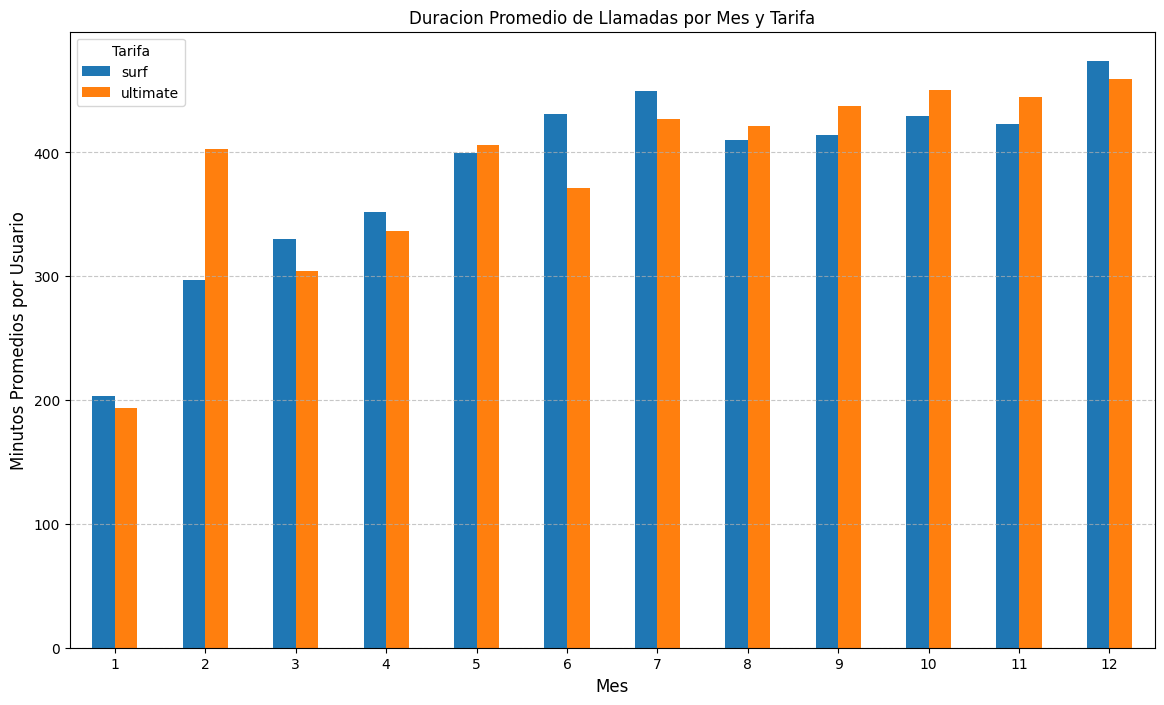

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged, users[['user_id','plan']], on='user_id',how='left')
plans.rename(columns={'plan_name':'plan'},inplace=True)
full = pd.merge(full,plans,on='plan',how='left')
avg_minutes_per_month = full.groupby(['plan','month'])['minutes_used'].mean().reset_index()
print('---Duracion promedio de minutos por plan y mes:---')
print(avg_minutes_per_month)

minutes_pivot =avg_minutes_per_month.pivot_table(
    index='month',
    columns='plan',
    values='minutes_used'
)
minutes_pivot.plot(kind='bar',figsize=(14,8))
plt.title('Duracion Promedio de Llamadas por Mes y Tarifa',fontsize=12)
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Minutos Promedios por Usuario',fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.legend(title='Tarifa')
plt.show()


---Analisis de la distribucion de Minutos Mensuales---


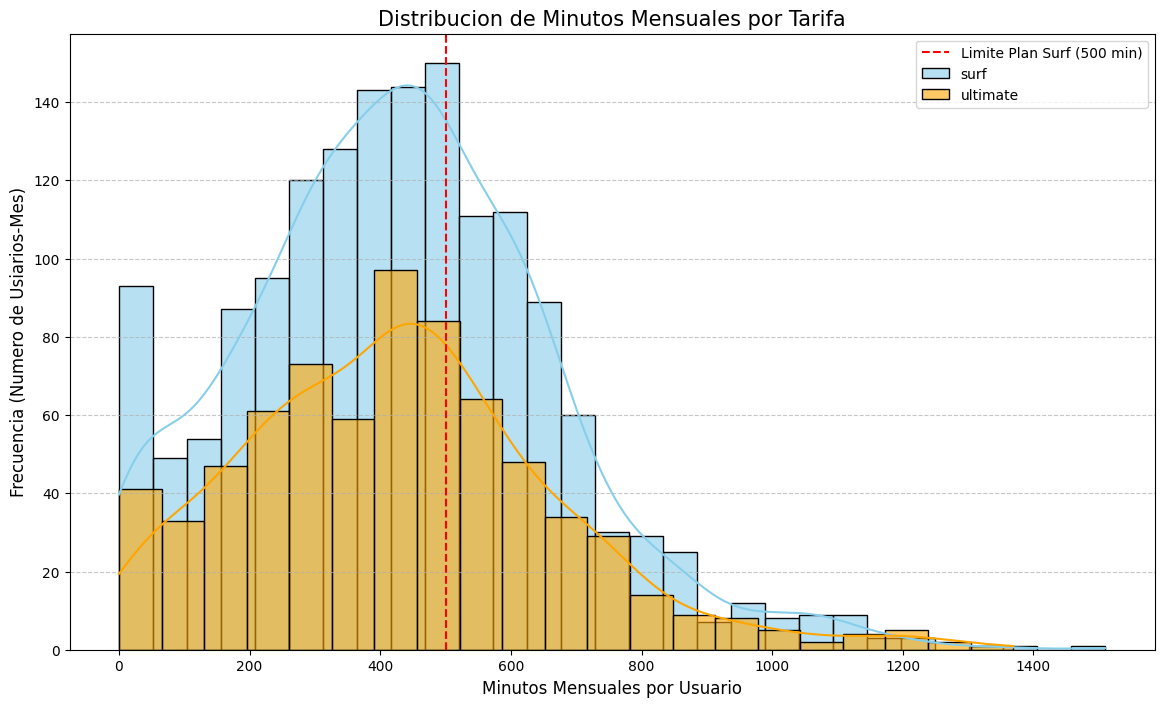

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 # Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

print('---Analisis de la distribucion de Minutos Mensuales---')

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()


full = pd.merge(merged,users[['user_id','plan']],on='user_id',how='left')
plans.rename(columns={'plan_name':'plan'},inplace=True)
full = pd.merge(full, plans, on='plan',how='left')

minutes_surf = full[full['plan'] == 'surf'] ['minutes_used']
minutes_ultimate = full[full['plan'] == 'ultimate']['minutes_used']

plt.figure(figsize=(14,8))
sns.histplot(minutes_surf, color='skyblue',label='surf',kde=True, alpha=0.6)
sns.histplot(minutes_ultimate, color='orange',label='ultimate',kde=True,alpha=0.6)

plt.axvline(x=500,color='red',linestyle='--',label='Limite Plan Surf (500 min)')
plt.title('Distribucion de Minutos Mensuales por Tarifa',fontsize=15)
plt.xlabel('Minutos Mensuales por Usuario',fontsize=12)
plt.ylabel('Frecuencia (Numero de Usiarios-Mes)',fontsize=12)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Calcula la media y la varianza de la duración mensual de llamadas.


users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

calls_stats = full.groupby('plan')['minutes_used'].agg(['mean','var','std']).reset_index()

calls_stats.rename(columns={
    'mean': 'Media de Minutos',
    'var': 'Varianza de Minutos',
    'std': 'Desviacion Estandar de Minutos'

},inplace=True)
print('---Estadisticas de Duracion Mensual de Llamadas por Tarifa:---')
print(calls_stats.round(2))

---Estadisticas de Duracion Mensual de Llamadas por Tarifa:---
       plan  Media de Minutos  Varianza de Minutos  \
0      surf            428.75             54968.28   
1  ultimate            430.45             57844.46   

   Desviacion Estandar de Minutos  
0                          234.45  
1                          240.51  


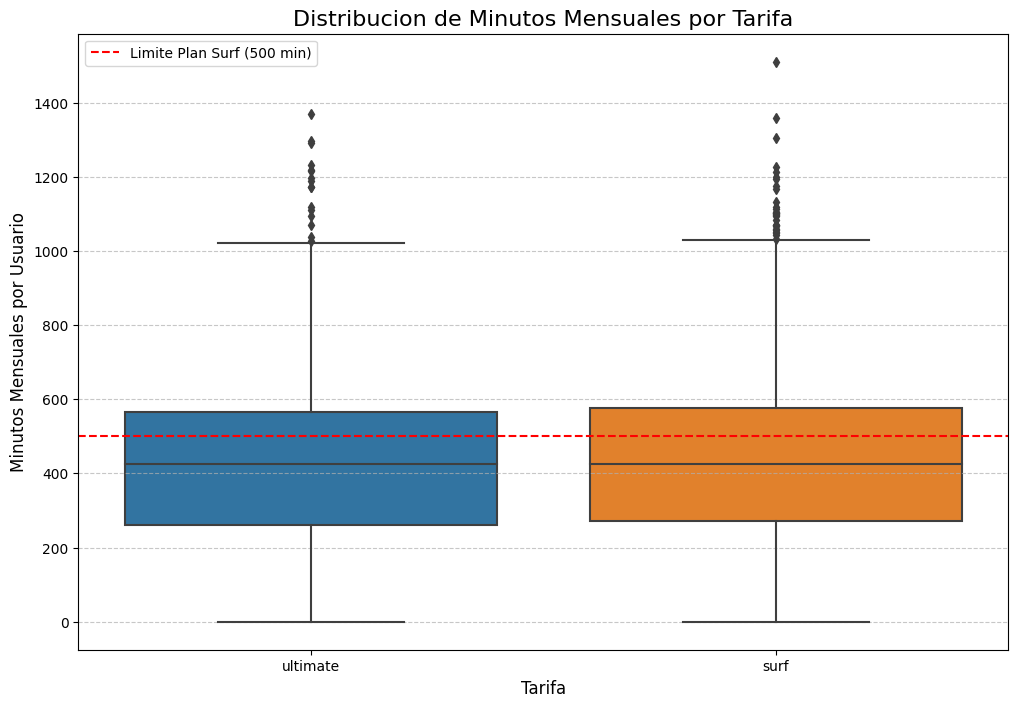

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

calls = pd.read_csv('/datasets/megaline_calls.csv') 

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month

calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()
full = pd.merge(merged, users[['user_id','plan']],on='user_id',how='left')
plans.rename(columns={'plan_name':'plan'},inplace=True)
full = pd.merge(full,plans,on='plan',how='left')

plt.figure(figsize=(12,8))
sns.boxplot(x='plan',y='minutes_used',data=full)

plt.axhline(y=500,color='red',linestyle='--',label='Limite Plan Surf (500 min)')
plt.title('Distribucion de Minutos Mensuales por Tarifa',fontsize=16)
plt.xlabel('Tarifa',fontsize=12)
plt.ylabel('Minutos Mensuales por Usuario',fontsize=12)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?] Los usuario de Surf y Ultimate tienen, en esencia, el mismo patron de consumo de llamadas. La diferencia radica en los minutos que ofrece cada plan y en la interaccion del mismo. Esto significa que el plan Surf esta diseñado estrategicamente para generar ingresos extras, como lo hemos demostrado varios clientes sobrepasan su limite de llamadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


### Mensajes

---Numero promedio de mensajes por plan y mes---
        plan  month  messages_sent
0       surf      1      10.500000
1       surf      2      12.000000
2       surf      3      15.260870
3       surf      4      17.400000
4       surf      5      24.012987
5       surf      6      25.298969
6       surf      7      27.033058
7       surf      8      28.777778
8       surf      9      30.762887
9       surf     10      33.839662
10      surf     11      32.385159
11      surf     12      38.600629
12  ultimate      1      15.500000
13  ultimate      2      21.571429
14  ultimate      3      20.250000
15  ultimate      4      22.047619
16  ultimate      5      32.103448
17  ultimate      6      29.340426
18  ultimate      7      32.830508
19  ultimate      8      38.478873
20  ultimate      9      37.895349
21  ultimate     10      39.443396
22  ultimate     11      38.606299
23  ultimate     12      45.006623


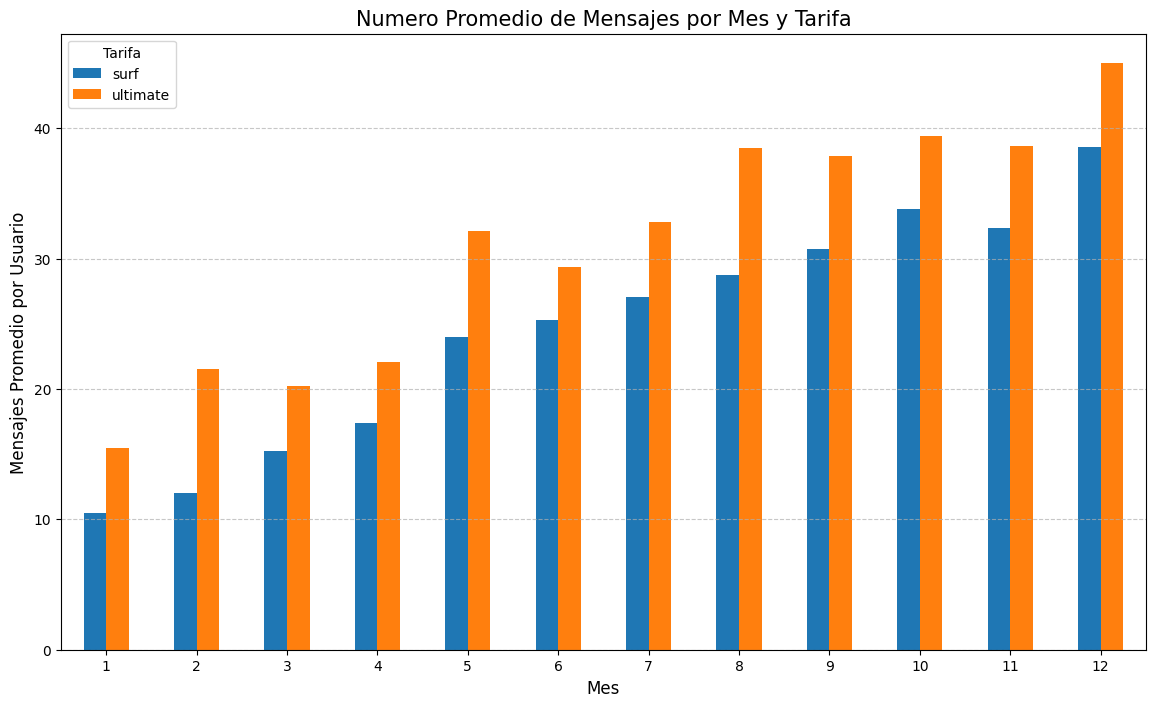

In [35]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()



messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)


internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]


merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged, internet_monthly, on=['user_id','month'],how='outer')
merged = merged.fillna(0)


users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")


avg_messages_per_month = full.groupby(["plan","month"])["messages_sent"].mean().reset_index()
print("---Numero promedio de mensajes por plan y mes---")
print(avg_messages_per_month)

messages_pivot = avg_messages_per_month.pivot_table(
    index='month',
    columns='plan',
    values='messages_sent'
)
messages_pivot.plot(kind='bar',figsize=(14,8))
plt.title('Numero Promedio de Mensajes por Mes y Tarifa',fontsize=15)
plt.xlabel('Mes',fontsize=12)
plt.ylabel('Mensajes Promedio por Usuario',fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.legend(title='Tarifa')
plt.show()

---Consumo promedio de GB Facturables por plan y mes:---
        plan  month    gb_used
0       surf      1   5.000000
1       surf      2  12.222222
2       surf      3  13.565217
3       surf      4  12.220000
4       surf      5  14.116883
5       surf      6  15.484536
6       surf      7  16.876033
7       surf      8  16.882716
8       surf      9  16.690722
9       surf     10  17.409283
10      surf     11  16.431095
11      surf     12  18.238994
12  ultimate      1   7.250000
13  ultimate      2  17.285714
14  ultimate      3  18.416667
15  ultimate      4  16.333333
16  ultimate      5  16.862069
17  ultimate      6  15.425532
18  ultimate      7  16.491525
19  ultimate      8  17.845070
20  ultimate      9  17.011628
21  ultimate     10  17.716981
22  ultimate     11  17.118110
23  ultimate     12  18.397351


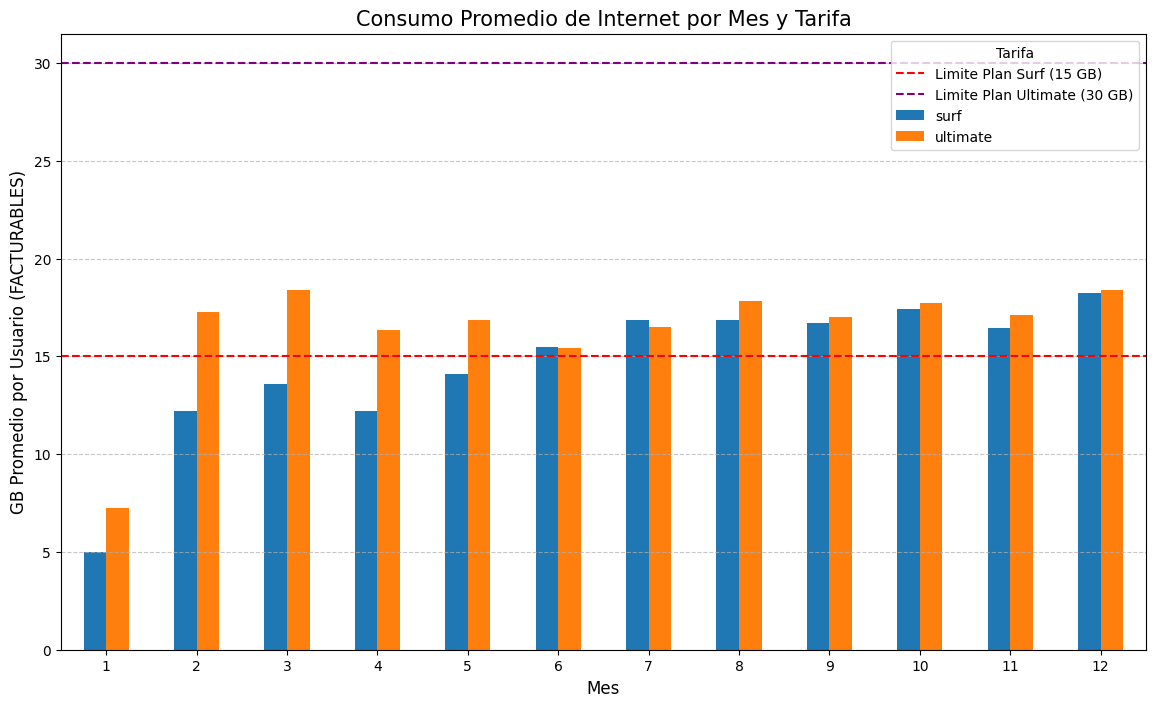

In [36]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()


messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)


internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]



merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged, internet_monthly, on=['user_id','month'],how='outer')
merged = merged.fillna(0)


users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")

avg_gb_per_month = full.groupby(['plan','month'])['gb_used'].mean().reset_index()

print('---Consumo promedio de GB Facturables por plan y mes:---')
print(avg_gb_per_month)

gb_pivot = avg_gb_per_month.pivot_table(
    index='month',
    columns='plan',
    values='gb_used'
)
gb_pivot.plot(kind='bar',figsize=(14,8))
plt.axhline(y=15,color='red',linestyle='--',label='Limite Plan Surf (15 GB)')
plt.axhline(y=30,color='purple',linestyle='--',label='Limite Plan Ultimate (30 GB)')

plt.title('Consumo Promedio de Internet por Mes y Tarifa',fontsize=15)
plt.xlabel('Mes',fontsize=12)
plt.ylabel('GB Promedio por Usuario (FACTURABLES)',fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.legend(title='Tarifa')
plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

- Recomiendo agregar más gráficas como se hizo en `llamadas` para mantener la misma consistencia en el proyecto
- La gráfica del uso de datos debe ir en la sección de `internet`, debemos respetar el contenido de cada una de las secciones    
</div>


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?] Adiferencia de las llamadas, se puede observar ina diferencia en el comportamiento promedio. Los usuarios del plan Ultimate tienen a enviar consistentemente mas mensajes que los usuarios del plan Surf a lo largo del año. Al igual que las llamadas, el uso de mensajes para ambos planes muestra una clara tendencia a aumentar a medida que avanza el año.

### Internet

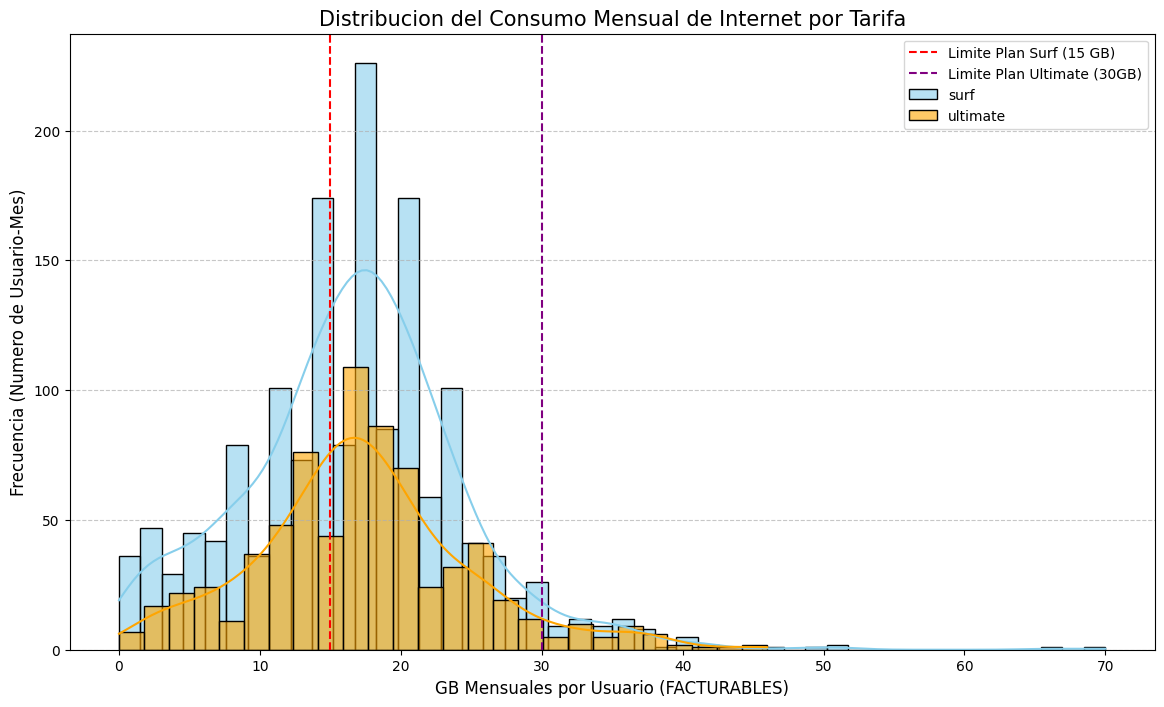

In [37]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)

internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")


gb_surf = full[full['plan']=='surf']['gb_used']
gb_ultimate = full[full['plan']=='ultimate']['gb_used']

plt.figure(figsize=(14,8))

sns.histplot(gb_surf, color='skyblue',label='surf',kde=True,alpha=0.6)
sns.histplot(gb_ultimate, color='orange',label='ultimate',kde=True,alpha=0.6)

plt.axvline(x=15, color='red',linestyle='--',label='Limite Plan Surf (15 GB)')
plt.axvline(x=30, color='purple',linestyle='--',label='Limite Plan Ultimate (30GB)')
plt.title('Distribucion del Consumo Mensual de Internet por Tarifa',fontsize=15)
plt.xlabel('GB Mensuales por Usuario (FACTURABLES)',fontsize=12)
plt.ylabel('Frecuencia (Numero de Usuario-Mes)',fontsize=12)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

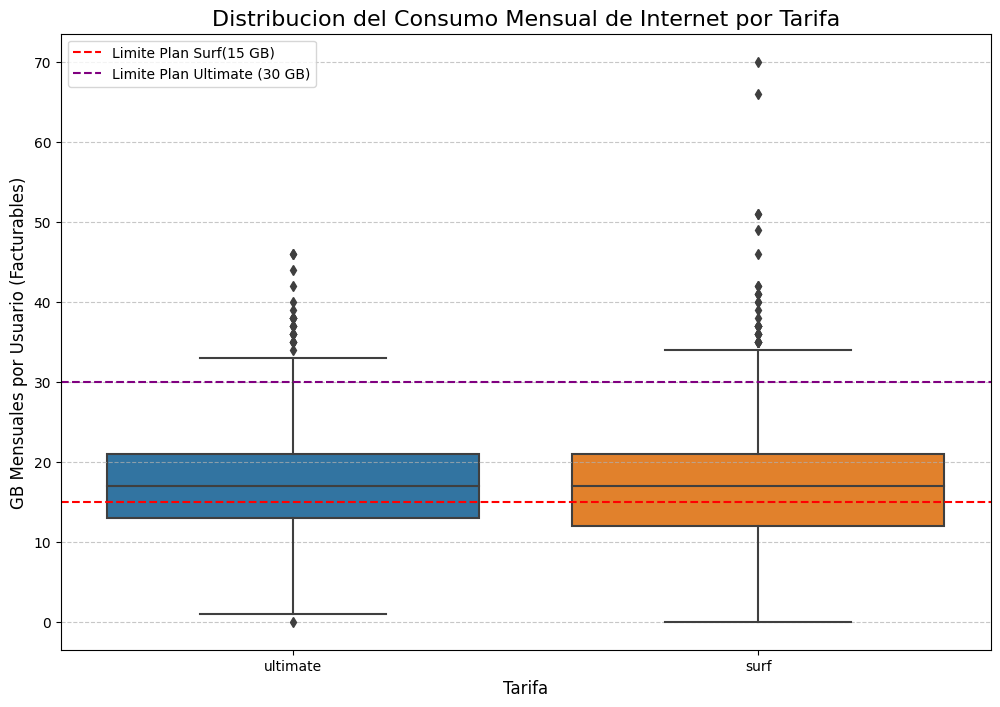

In [38]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()


messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)

internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]


users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")


plt.figure(figsize=(12,8))
sns.boxplot(x='plan',y='gb_used',data=full)
plt.axhline(y=15, color='red',linestyle='--',label='Limite Plan Surf(15 GB)')
plt.axhline(y=30, color='purple',linestyle='--',label='Limite Plan Ultimate (30 GB)')
plt.title('Distribucion del Consumo Mensual de Internet por Tarifa',fontsize=16)
plt.xlabel('Tarifa',fontsize=12)
plt.ylabel('GB Mensuales por Usuario (Facturables)',fontsize=12)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()



[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?] Megaline ha diseñado el plan Surf con un limite de datos que es intencionalmente bajo en comparacion al consumo de sus clientes. Esto significa que Megaline genera ingresos variables a traves de la venta de paquetes de datos adicionales. Como podermos ver en el grafico la linea roja es el limite del plan Surf (15gb) los usuarios del mimo plan superan su limite de datos. Cada ves que esto ocurre Megaline ingresa $ 10 adicionales.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)



internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]



merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged, internet_monthly, on=['user_id','month'],how='outer')
merged = merged.fillna(0)

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")



def calculate_revenue(row):
    minutes_over = max(0, row['minutes_used'] - row['minutes_included'])
    messages_over = max(0, row['messages_sent'] - row['messages_included'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_over = max(0, row['gb_used'] - gb_included)
    minutes_charge = minutes_over * row['usd_per_minute']
    messages_charge = messages_over * row['usd_per_message']
    gb_charge = gb_over * row['usd_per_gb']
    total_revenue = row['usd_monthly_pay'] + minutes_charge + messages_charge + gb_charge
    return total_revenue
full['monthly_revenue'] = full.apply(calculate_revenue,axis=1)


print('---Calcular estadisticas descriptivas de ingresos---')
revenue_stats = full.groupby('plan')['monthly_revenue'].agg(['mean','median','var','std']).reset_index()
revenue_stats.rename(columns={
    'mean':'Ingreso Medio',
    'median':'Ingreso Mediano',
    'var':'Varianza del Ingreso',
    'std':'Desviacion Estandar del Ingreso'
},inplace=True)
print('Estadistica del Ingreso Mensuales por Tarifa:')
print(revenue_stats.round(2))

---Calcular estadisticas descriptivas de ingresos---
Estadistica del Ingreso Mensuales por Tarifa:
       plan  Ingreso Medio  Ingreso Mediano  Varianza del Ingreso  \
0      surf          60.71            40.36               3067.84   
1  ultimate          72.31            70.00                129.85   

   Desviacion Estandar del Ingreso  
0                            55.39  
1                            11.40  


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.] 
En promedio un usuario de la tarifa Ultimate genera $ 72.31 al mes, mientras que un usuario de Surf genera $ 60.71 esto a pesar que muchos usuarios del mismo plan pagan extra, la alta cuota fija del plan Ultimate hace que, en promedio, sea mas rentable para la compañía. El ingreso Mediano del plan Surf de $ 40.36 es mas del doble de la cuotra base $20, esto confirma que los usuarios pagan constanmente por servicios extras. 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
import pandas as pd 
import numpy as np
from scipy import stats as st 
# Prueba las hipótesis

calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)

internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]

merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged, internet_monthly, on=['user_id','month'],how='outer')
merged = merged.fillna(0)

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")

def calculate_revenue(row):
    minutes_over = max(0, row['minutes_used'] - row['minutes_included'])
    messages_over = max(0, row['messages_sent'] - row['messages_included'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_over = max(0, row['gb_used'] - gb_included)
    minutes_charge = minutes_over * row['usd_per_minute']
    messages_charge = messages_over * row['usd_per_message']
    gb_charge = gb_over * row['usd_per_gb']
    total_revenue = row['usd_monthly_pay'] + minutes_charge + messages_charge + gb_charge
    return total_revenue
full['monthly_revenue'] = full.apply(calculate_revenue,axis=1)


revenue_surf = full[full['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = full[full['plan'] == 'ultimate']['monthly_revenue']
alpha = 0.05
results = st.ttest_ind(revenue_surf,revenue_ultimate,equal_var=False)
print(f'Prueba de Hipotesis para los ingreso Promedio(Surf vs Ultimate)')
print(f'Valor p: {results.pvalue}')

if results.pvalue < alpha:
    print('Conclusion: Rechazamos la hipotesis nula.')
    print('Existe una diferencia estadisticamente significativa entre los ingresos promedio de las 2 tarifas.')
else:
    print('Conclusion: No podemos rechazar la hipotesis nula.')
    print('No hay suficiente evidencia para afirmar que los ingresos promedio de las 2 tarifas son diferentes.')


Prueba de Hipotesis para los ingreso Promedio(Surf vs Ultimate)
Valor p: 3.1703905481135734e-15
Conclusion: Rechazamos la hipotesis nula.
Existe una diferencia estadisticamente significativa entre los ingresos promedio de las 2 tarifas.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [41]:
import pandas as pd
import numpy as np
from scipy import stats as st
# Prueba las hipótesis
calls = pd.read_csv('/datasets/megaline_calls.csv') 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['month'] = calls ['call_date'].dt.month
calls_monthly = calls.groupby(['user_id', 'month',]).agg(
    calls_made=('id','count'),
    minutes_used = ('duration','sum')
).reset_index()

messages = pd.read_csv('/datasets/megaline_messages.csv') 
messages['message_date'] = pd.to_datetime(messages['message_date'],format = '%Y-%m-%d')
messages['messages_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages_monthly = messages.groupby(['user_id','month'])['id'].count().reset_index()
messages_monthly.rename(columns={'id':'messages_sent'}, inplace=True)

internet = pd.read_csv('/datasets/megaline_internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date']) 
internet['month'] = internet['session_date'].dt.month
internet_monthly = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
internet_monthly ['gb_used'] = np.ceil(internet_monthly['mb_used'] / 1024)
internet_monthly = internet_monthly[['user_id','month','gb_used']]

merged = pd.merge(calls_monthly,messages_monthly, on=['user_id','month'],how='outer')
merged = pd.merge(merged, internet_monthly, on=['user_id','month'],how='outer')
merged = merged.fillna(0)

users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

full = pd.merge(merged,users[["user_id","plan","city"]],on="user_id",how="left")
plans.rename(columns={"plan_name":"plan"},inplace=True)
full=pd.merge(full,plans,on="plan",how="left")

def calculate_revenue(row):
    minutes_over = max(0, row['minutes_used'] - row['minutes_included'])
    messages_over = max(0, row['messages_sent'] - row['messages_included'])
    gb_included = row['mb_per_month_included'] / 1024
    gb_over = max(0, row['gb_used'] - gb_included)
    minutes_charge = minutes_over * row['usd_per_minute']
    messages_charge = messages_over * row['usd_per_message']
    gb_charge = gb_over * row['usd_per_gb']
    total_revenue = row['usd_monthly_pay'] + minutes_charge + messages_charge + gb_charge
    return total_revenue
full['monthly_revenue'] = full.apply(calculate_revenue,axis=1)

revenue_nynj = full[full['city'].str.contains('NY-NJ')]['monthly_revenue']
revenue_other = full[~full['city'].str.contains('NY-NJ')]['monthly_revenue']
alpha = 0.05
results_region = st.ttest_ind(revenue_nynj, revenue_other, equal_var=False)
print(f'Prueba de Hipotesis para los ingesos Promedio (NY-NJ vs Otras Regiones)')
print(f"Valor p: {results_region.pvalue}")
if results_region.pvalue < alpha:
    print("Conclusion: Rechaza la hipotesis nula.")
    print("Existe una diferencia estadistica significativa entre los ingresos promedio de NY-NJ y otras regiones")
else:
    print('Conclusion: No podemos rechazar la hipotesis nula.')
    print('No hay suficiente evidencia para afirmar que los ingresos promedio de NY-NJ y otras regiones son diferente.')

Prueba de Hipotesis para los ingesos Promedio (NY-NJ vs Otras Regiones)
Valor p: 0.0335256158853001
Conclusion: Rechaza la hipotesis nula.
Existe una diferencia estadistica significativa entre los ingresos promedio de NY-NJ y otras regiones


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos

1.- Lo primero que se hizo fue una inspeccion y preparacion de datos, esto con el fin de entender la estructura y ver la informacion generalisada.

2.- Despues viendo la informacion a detalle se encontraron algunos errores, columnas con informacion tipo object, fechas que tambien se tenian que convertir a datetime, esto se hizo con el fin de preparar los datos, se convirtieron fechas , aplique el redondo de minutos a la tabla call, se creo una nueva columna con la duracion de cada llamada al minuto entero mas cercano, una ves que las fechas estan en el formato correcto, extrajimos cada registro (llamada, mensaje, sesion) y lo guardamos en una nueva columna month. 

3.- El objetivo era calcular el consumo agregado por usuario y por mes. Se añadio una columna clave a cada uno de nuestos dataframes de consumo (calls, messages,internet). Se creo un dataframe consolidado esto con el fin de ver el consumo de cada usuario, para eso se agrego una columna user_id y month. 

4.- 

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>



<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, de manera que se mantenga una consistencia similar en todas las secciones
- Tener mayor orden en el proyecto
- No se deben leer los datos más de una vez en el proyecto
- No se deben importar las librerías más de una vez en el proyecto   
</div>
